# Load modules and Set Constants

In [2]:
import os, cv2, datetime

import matplotlib.pyplot as plt

## Directory constants

In [4]:
EXPERIMENT_DATA = {
    'name' : 'Korean_Food_Classification',
    'number' : '1',
    'description' : ['음식 카테고리 10개 선정 후 전이학습 결과 확인', 'ImageNet으로 학습 된 ResNet50 모델 사용']
}

ROOT_DIR = os.getcwd()

# Data directory
DATA_DIR = os.path.join(ROOT_DIR, 'Data')

TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'Train_data')
IMAGE_TRAIN_DATA_DIR = os.path.join(TRAIN_DATA_DIR, 'Food_001_data')
LABEL_TRAIN_DATA_DIR = os.path.join(TRAIN_DATA_DIR, 'Food_001_label')

VAL_DATA_DIR = os.path.join(DATA_DIR, 'Validation_data')
IMAGE_VAL_DATA_DIR = os.path.join(VAL_DATA_DIR, 'Food_001_data')
LABEL_VAL_DATA_DIR = os.path.join(VAL_DATA_DIR, 'Food_001_label')

DATA_LIST = ['가리비', '갈비탕', '골드키위', '과일채소샐러드', '그린올리브', '미역나물', '바게트빵', '바나나우유', '보드카', '보이차']

# Result directory
RESULT_DIR = os.path.join(ROOT_DIR, 'Results')

os.chdir(RESULT_DIR)
curr_result_dir_name = f'{EXPERIMENT_DATA['name']}_{EXPERIMENT_DATA['number']}'
if (curr_result_dir_name not in os.listdir()):
    os.mkdir(curr_result_dir_name)
CURR_RESULT_DIR = os.path.join(RESULT_DIR, curr_result_dir_name)

## Model parameter constants

In [6]:
NUM_CLASS = 10
BATCH_SIZE = 512
EPOCHS = 10

### Enter model information

In [8]:
os.chdir(CURR_RESULT_DIR)
with open('README.md', 'wt') as file:
    file.write('# Description of current experiment\n')
    file.write(f'- {curr_result_dir_name}\n')
    for desc in EXPERIMENT_DATA['description']:
        file.write(f'- {desc}\n')
    file.write('\n')

    file.write('# Experiment environment\n')
    file.write('- Colab Environment\n')

# Load and preprocess data

## Load train data

In [11]:
os.chdir(IMAGE_TRAIN_DATA_DIR)

x_train = []
for category in DATA_LIST:
    os.chdir(category)
    file_names = sorted(os.listdir())
    print(f'{category}: {len(file_names)}개,', end=' ')

    before = datetime.datetime.now()
    for file in file_names:
        try:
            source_image = cv2.cvtColor(cv2.imread(file, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
        except:
            print(f'Error file: {file}')
        x_train.append(cv2.resize(source_image, dsize=(224, 224), interpolation=cv2.INTER_LINEAR))
    timeDiff = datetime.datetime.now() - before

    print(f'{timeDiff.seconds}s')
    os.chdir('..')

가리비: 1040개, 9s
갈비탕: 882개, 2s
골드키위: 952개, 8s
과일채소샐러드: 4192개, 

Premature end of JPEG file


42s
그린올리브: 1317개, Error file: A220145XX_01437.jpg
11s
미역나물: 1395개, 8s
바게트빵: 4540개, 28s
바나나우유: 868개, 3s
보드카: 4842개, 41s
보이차: 1949개, 8s


In [12]:
os.chdir(LABEL_TRAIN_DATA_DIR)

y_train = []
for category in DATA_LIST:
    os.chdir(category + ' json')
    file_names = sorted(os.listdir())
    print(f'{category}: {len(file_names)}개,')
    for file in file_names:
        with open(file, 'r') as file:
            label = json.load(file)[0]
        y_train.append(label['Name'])
    os.chdir('..')

가리비: 1040개,
갈비탕: 882개,
골드키위: 952개,
과일채소샐러드: 4194개,
그린올리브: 1532개,
미역나물: 2191개,
바게트빵: 4540개,
바나나우유: 868개,
보드카: 4842개,
보이차: 1949개,


In [13]:
print(f'Total train data number: ({len(x_train)}, {len(y_train)})')

Total train data number: (21977, 22990)


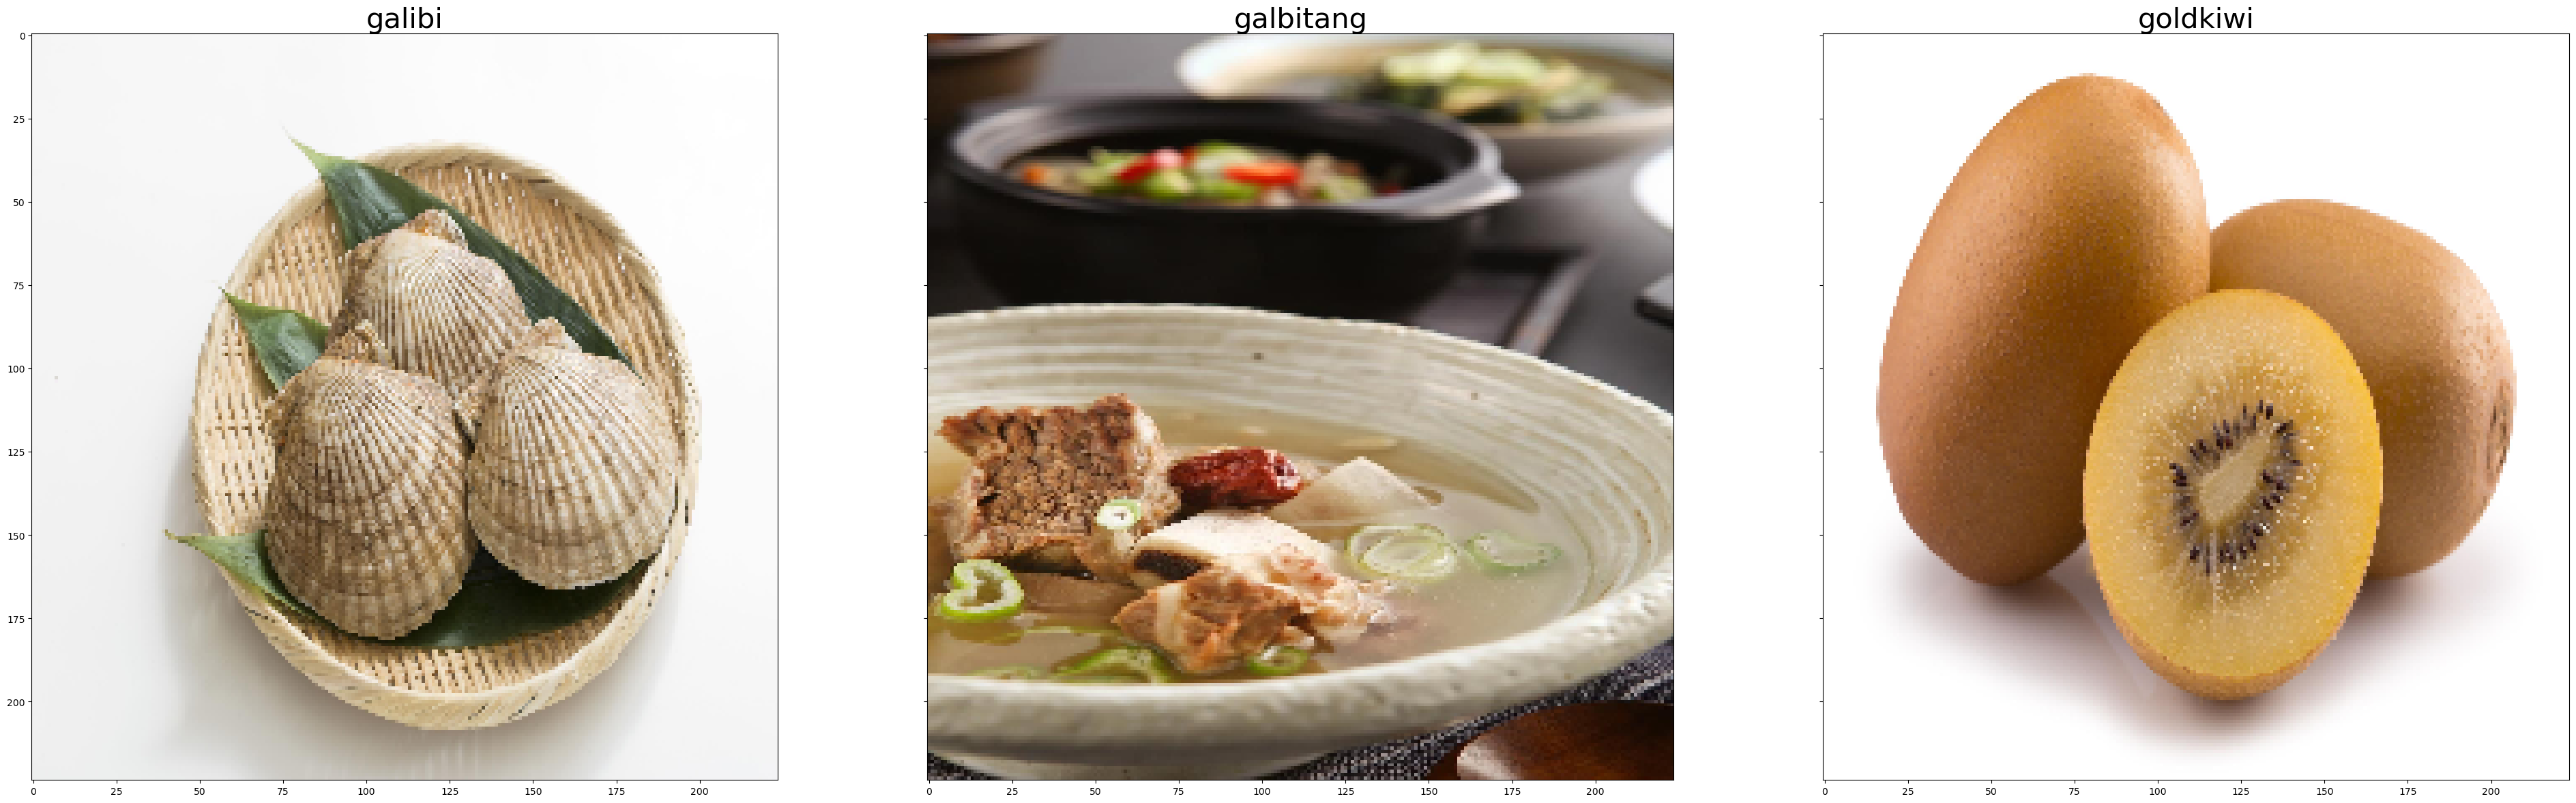

In [14]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(48,16))
for axIdx, dataIdx in enumerate([0, 1040, 1922]):
    ax[axIdx].imshow(x_train[dataIdx])
    ax[axIdx].set_title(y_train[dataIdx], fontsize=30)
plt.show()

## Load validation data

In [16]:
os.chdir(IMAGE_VAL_DATA_DIR)

x_test = []
for category in DATA_LIST:
    os.chdir(category)
    file_names = sorted(os.listdir())
    print(f'{category}: {len(file_names)} 개,', end='')

    before = datetime.datetime.now()
    for file in file_names:
        try:
            source_image = cv2.cvtColor(cv2.imread(file, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
        except:
            print(f'Error file: {file}')
        x_test.append(cv2.resize(source_image, dsize=(224, 224), interpolation=cv2.INTER_LINEAR))
    timeDiff = datetime.datetime.now() - before

    print(f'{timeDiff.seconds}s')
    os.chdir('..')

가리비: 132 개,0s
갈비탕: 111 개,0s
골드키위: 120 개,0s
과일채소샐러드: 525 개,4s
그린올리브: 192 개,1s
미역나물: 274 개,1s
바게트빵: 567 개,3s
바나나우유: 109 개,0s
보드카: 606 개,3s
보이차: 244 개,0s


In [17]:
os.chdir(LABEL_VAL_DATA_DIR)

y_test = []
for category in DATA_LIST:
    os.chdir(category + ' json')
    file_names = sorted(os.listdir())
    for file in file_names:
        with open(file, 'r') as file:
            label = json.load(file)[0]
        y_test.append(label['Name'])
    os.chdir('..')

In [43]:
print(f'Total validation data number: ({len(x_test)}, {len(y_test)})')

Total validation data number: (2880, 2880)


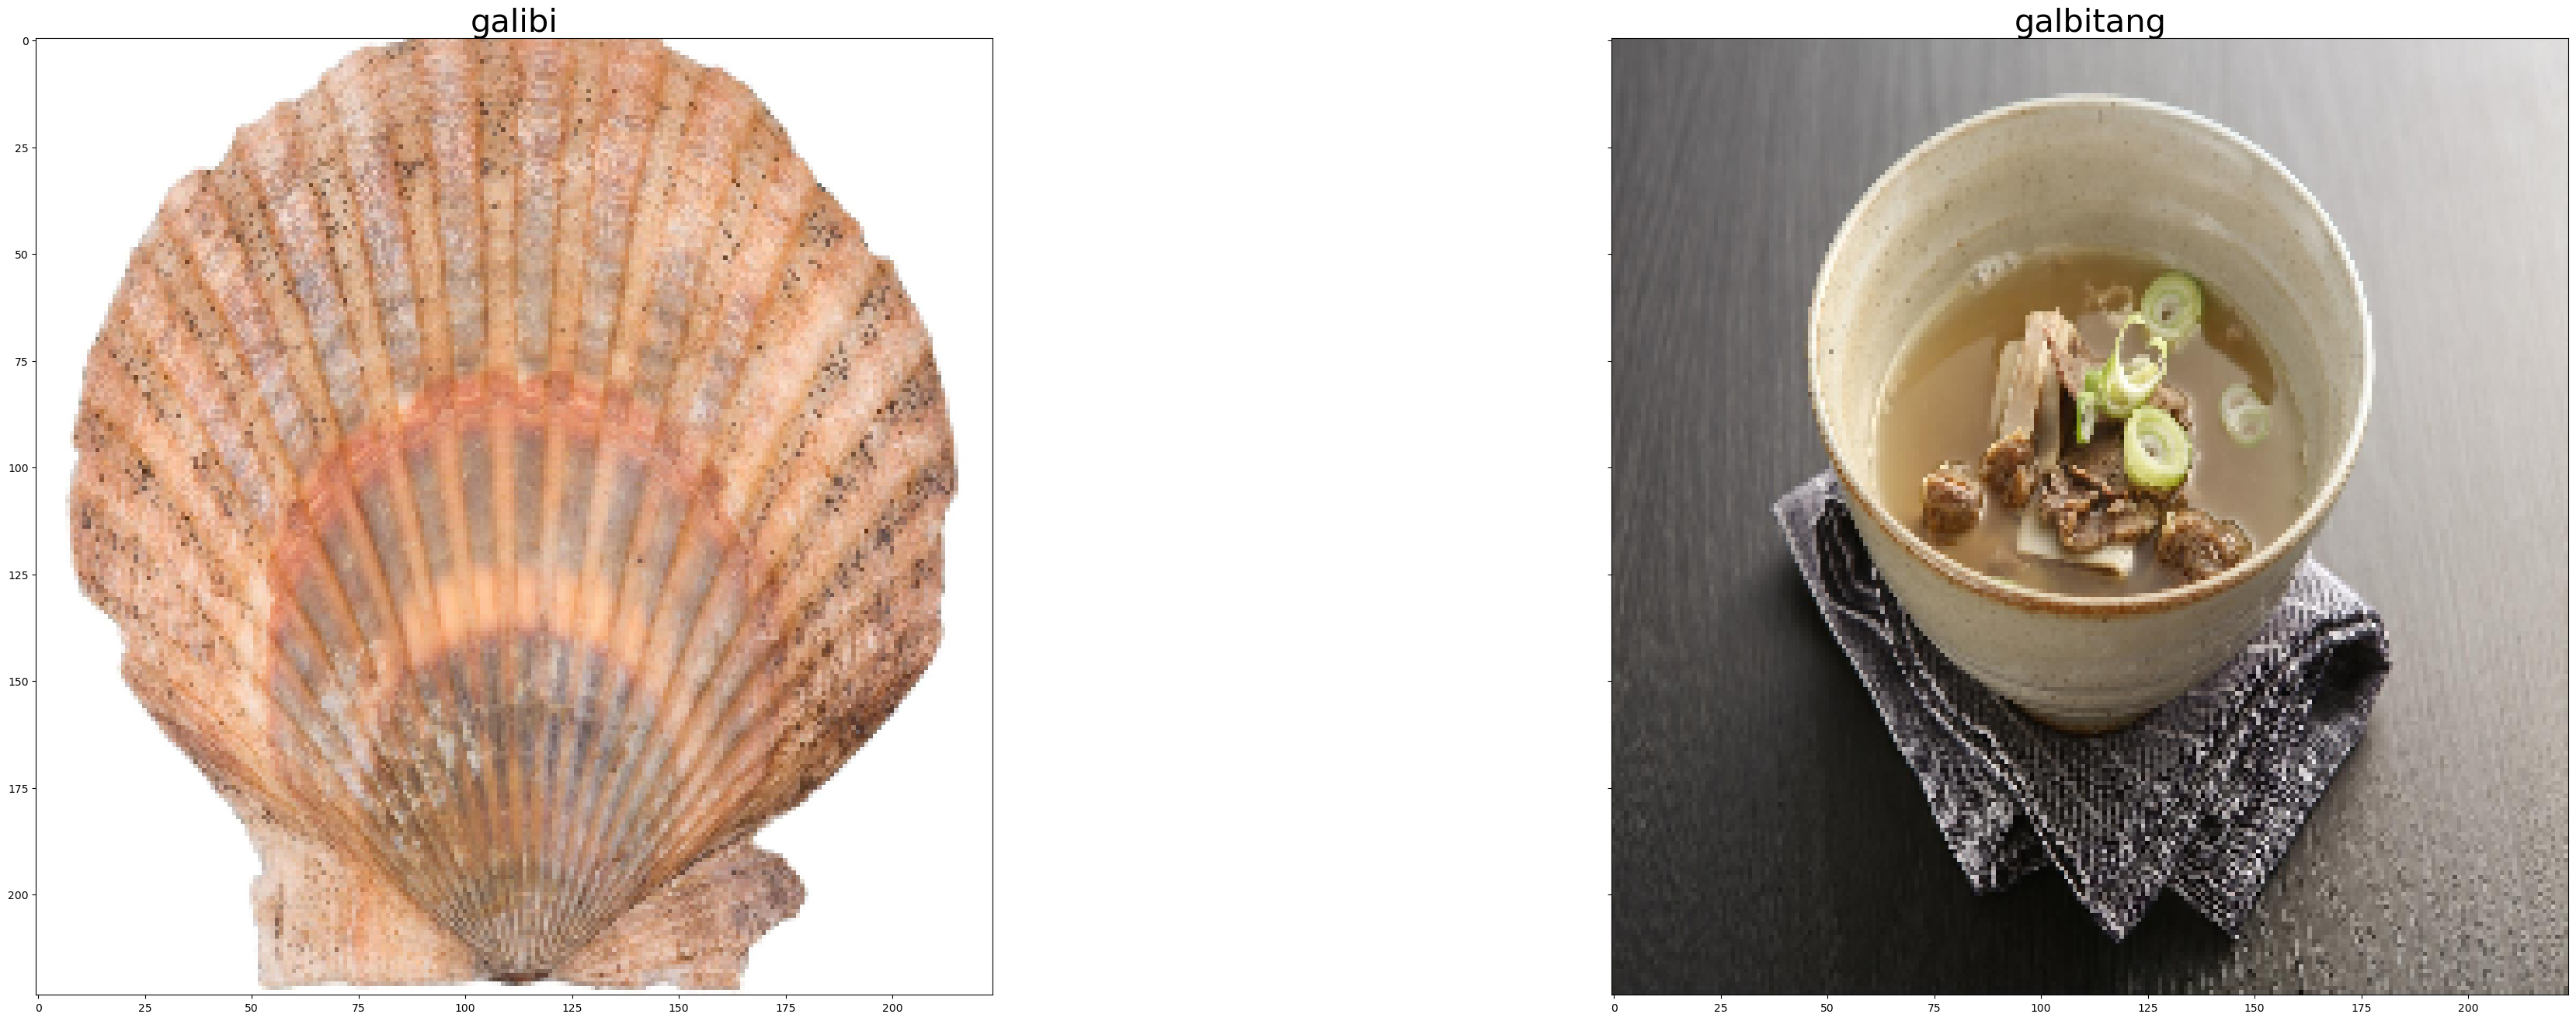

In [19]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(48,16))
for axIdx, dataIdx in enumerate([131, 132]):
    ax[axIdx].imshow(x_test[dataIdx])
    ax[axIdx].set_title(y_test[dataIdx], fontsize=30)
plt.show()

# Model Building

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
resnet = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [23]:
x = resnet.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
output = layers.Dense(NUM_CLASS, activation='softmax')(x)

In [24]:
model = keras.Model(resnet.input, output)

In [47]:
os.chdir(CURR_RESULT_DIR)

keras.utils.plot_model(model, show_shapes=True)
with open('README.md', 'a') as file:
    file.write('# Model information)\n')
    file.write('- [Model Plots](model.png)\n\n')

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['acc'])

## Model Training

In [ ]:
history = model.fit(x_train, epochs=EPOCHS, validation_data=(x_test, y_test))

# Plot Results

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test-Loss: {test_loss}, Test-Acc: {test_acc}')

In [ ]:
with open('README.md', 'a') as file:
    file.write('# Results\n')

    file.write('## Loss\n')
    file.write(f'- Train Loss: {history.history["loss"][-1]:.4f}\n')
    file.write(f'- Test Loss: {test_loss:.4f}\n\n')

    file.write('### Loss Graph\n')
    file.write('![](Loss_Result.png)\n\n')

    file.write('## Accuracy\n')
    file.write(f'- Train Accuracy: {history.history["acc"][-1] * 100:.2f}%\n')
    file.write(f'- Test Accuracy: {test_acc * 100:.2f}%\n')

    file.write('### Accuracy Graph\n')
    file.write('![](Accuracy_Result.png)\n\n')

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legen(['Acc', 'Val Acc'])
plt.title(f'Korean Food Classification {EXPERIMENT_DATA["number"]}(Acc)')

plt.savefig('Accuracy_Result.png')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legen(['Loss', 'Val Loss'])
plt.title(f'Korean Food Classification {EXPERIMENT_DATA["number"]}(Loss)')

plt.savefig('Loss_Result.png')
plt.show()